In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
ev_df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
city_df = pd.read_csv("us_cities.csv")

In [3]:
ev_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
city_df.head()

,Unnamed: 0,City,State,Region,Size,Population,AvgRent,MedianRent,UnempRate,AvgIncome,CostOfLiving,PriceParity,CommuteTime,MedianAQI,WalkScore,BikeScore,TransitScore,Latitude,Longitude
0,0,New York,New York,Northeast,Large,20140470.0,3272,2323.0,3.8,85136.0,128.0,114.58,36.7,50.0,88.0,69.3,6.9,40.6943,-73.9249
1,1,Los Angeles,California,West,Large,13200998.0,2857,1925.0,3.9,75821.0,140.6,113.82,30.7,70.0,68.6,58.7,6.2,34.1141,-118.4068
2,2,Chicago,Illinois,Midwest,Large,9618502.0,1975,1364.0,4.2,71992.0,100.1,105.42,31.8,50.0,77.2,72.2,5.1,41.8375,-87.6866
3,3,Dallas,Texas,South,Large,7637387.0,1754,1440.0,3.2,66727.0,98.5,103.85,28.6,51.0,46.0,49.3,2.8,32.7935,-96.7667
4,4,Houston,Texas,South,Large,7122240.0,1620,1216.0,3.9,64837.0,95.8,99.74,30.0,57.0,47.5,48.6,2.8,29.7860,-95.3885


In [5]:
city_dropna=city_df.dropna()

city_new = city_dropna[['City','AvgIncome']]

city_reset = city_new.reset_index(drop=True)
city_reset

,City,AvgIncome
0,New York,85136.0
1,Los Angeles,75821.0
2,Chicago,71992.0
3,Dallas,66727.0
4,Houston,64837.0
...,...,...
68,Anchorage,67085.0
69,Montgomery,49310.0
70,Lincoln,56887.0
71,Lubbock,51045.0


In [6]:
electric_cars_count = ev_df.groupby('City').size().reset_index(name='Count')
# electric_cars_count
# 将电动汽车数量合并到第一张表
result_df = pd.merge(city_reset, electric_cars_count, on='City')
result_df

,City,AvgIncome,Count
0,Los Angeles,75821.0,3
1,Chicago,71992.0,1
2,Dallas,66727.0,1
3,Washington,80822.0,5
4,Philadelphia,72379.0,1
5,Miami,73522.0,1
6,Phoenix,58308.0,3
7,Riverside,50384.0,4
8,Seattle,89274.0,25675
9,Minneapolis,71912.0,1


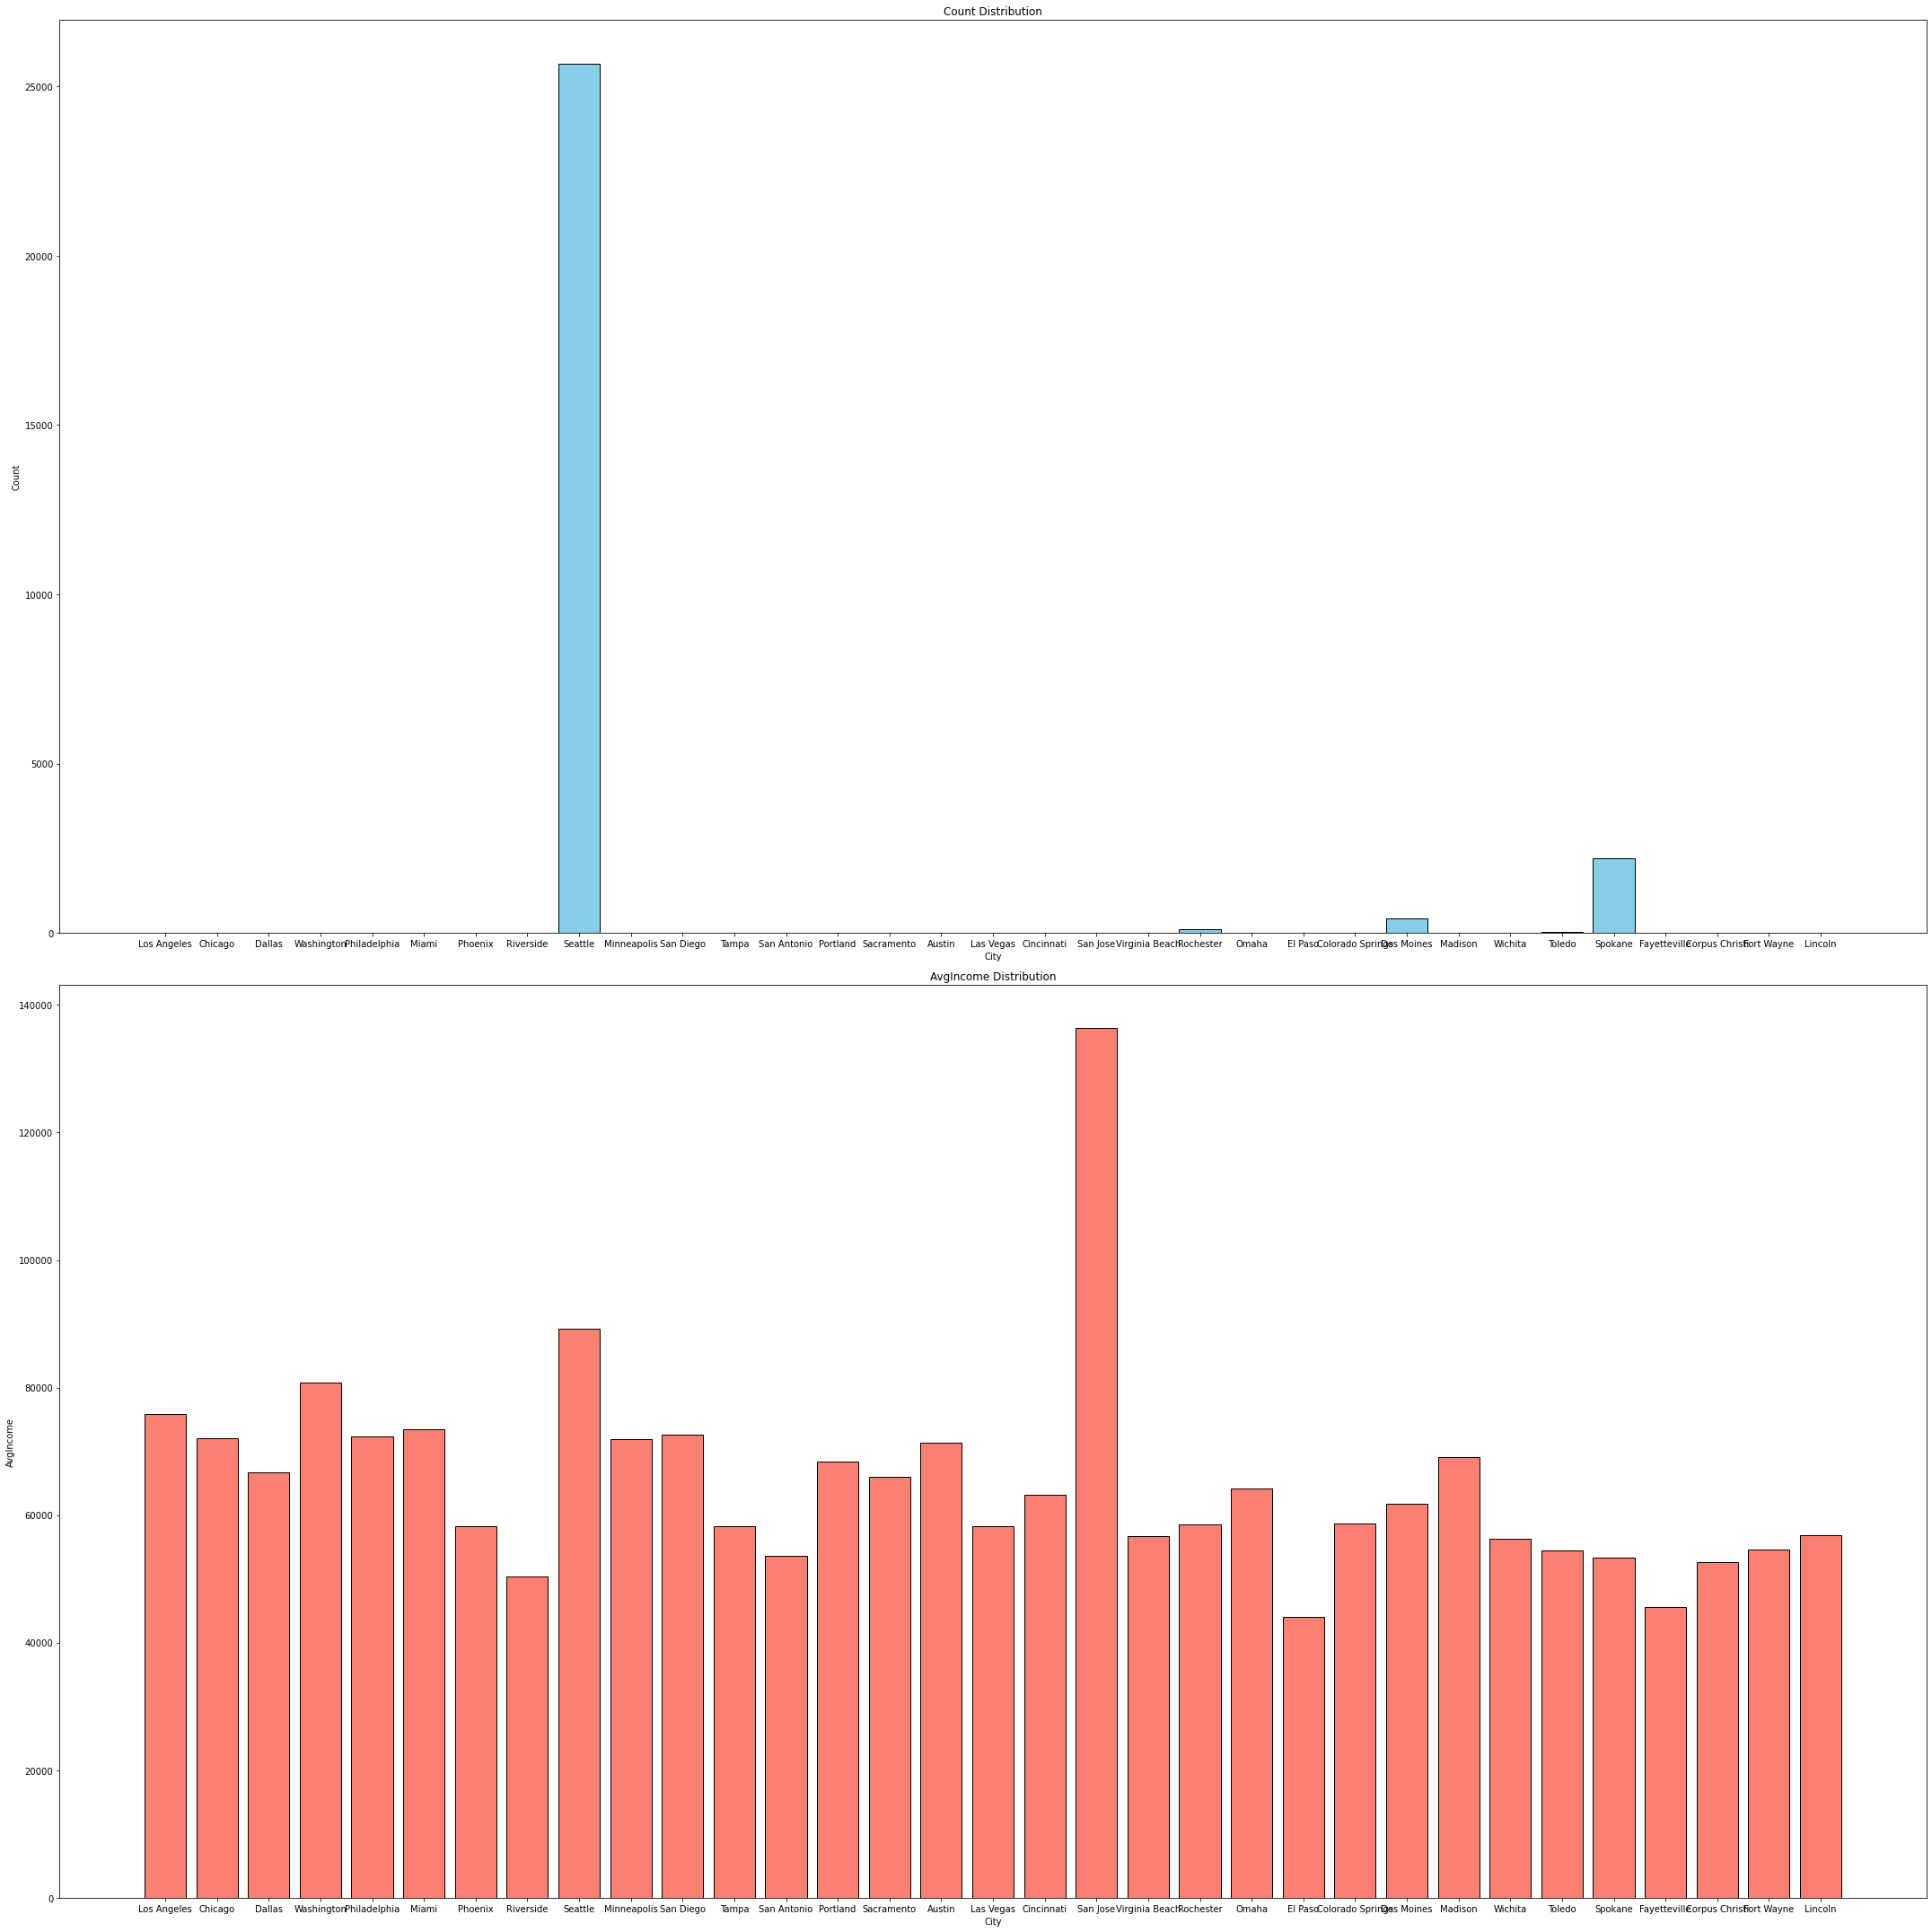

In [36]:
# plots of the data distributions
plt.figure(figsize=(30, 30))

# Histogram for Sales
plt.subplot(2, 1, 1)
plt.bar(result_df['City'],result_df['Count'], color='skyblue', edgecolor='black')
plt.title('Count Distribution')
plt.xlabel('City')
plt.ylabel('Count')

# Histogram for Temperature
plt.subplot(2, 1, 2)
plt.bar(result_df['City'],result_df['AvgIncome'], color='salmon', edgecolor='black')
plt.title('AvgIncome Distribution')
plt.xlabel('City')
plt.ylabel('AvgIncome')

plt.tight_layout()
plt.show()


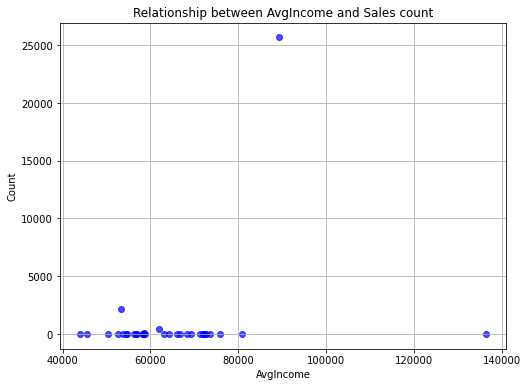

Correlation Coefficient between AvgIncome and count: 0.2547912758506621


In [8]:
correlation = result_df['AvgIncome'].corr(result_df['Count'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(result_df['AvgIncome'], result_df['Count'], color='blue', alpha=0.7)
plt.title('Relationship between AvgIncome and Sales count')
plt.xlabel('AvgIncome')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Print the correlation coefficient
print(f'Correlation Coefficient between AvgIncome and count: {correlation}')

In [9]:
# Define the independent variable (X) and the dependent variable (y)
X = result_df['AvgIncome']
X = sm.add_constant(X)  # Add a constant term to the independent variable
y = result_df['Count']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.152
Date:                Tue, 12 Dec 2023   Prob (F-statistic):              0.152
Time:                        12:05:36   Log-Likelihood:                -322.59
No. Observations:                  33   AIC:                             649.2
Df Residuals:                      31   BIC:                             652.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3678.7152   3189.455     -1.153      0.2

Test 2

In [10]:
county_df = pd.read_excel("median_household_income_estimates.xlsx",header=3)

In [11]:
county_dropna=county_df.dropna()
county_dropna['County'] = county_dropna['Unnamed: 0']
county_dropna['AvgIncome'] = county_dropna[2022]
county_dropna

C:\Users\93505\AppData\Local\Temp\ipykernel_34980\2411361567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_dropna['County'] = county_dropna['Unnamed: 0']
C:\Users\93505\AppData\Local\Temp\ipykernel_34980\2411361567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_dropna['AvgIncome'] = county_dropna[2022]


,Unnamed: 0,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2015,2016,2017,2018,2019,2020,2021,2022,County,AvgIncome
1,Washington,31183,33417.061,34379.118,35881.524,36678.568,37894.965,38996.782,40568.226,42399.362,...,63439.20,65500.290875,69287.868831,72297.030172,78674.0,80319.0,84155.0,86343.030000,Washington,86343.030000
2,Adams,24604,28024.074,27300.700,28328.127,31277.360,29537.150,29603.720,31806.107,31794.792,...,47645.73,49501.385091,48848.793830,52870.057114,53535.0,56421.0,57405.0,58406.161270,Adams,58406.161270
3,Asotin,22897,24206.219,25110.440,26250.554,27358.886,27872.895,28288.256,29812.595,31498.836,...,46107.27,47020.113312,51766.880459,50746.366302,54776.0,53377.0,56438.0,59674.538547,Asotin,59674.538547
4,Benton,32593,35011.606,37093.354,39227.763,41153.190,42789.890,42539.628,42816.605,44056.502,...,62071.02,62282.049221,63501.707462,67912.297802,72847.0,75882.0,77339.0,78823.975660,Benton,78823.975660
5,Chelan,24312,25833.442,27592.308,28745.697,30148.302,31546.570,32163.776,33918.164,35661.808,...,53067.96,55109.142422,60790.913046,60747.403036,59838.0,61546.0,64700.0,68015.630585,Chelan,68015.630585
6,Clallam,25434,27329.220,27861.112,28577.986,29340.212,29950.640,31162.518,32558.772,34769.840,...,46240.92,48187.110514,47766.585450,55664.085098,57571.0,54712.0,62623.0,65652.257946,Clallam,65652.257946
7,Clark,31800,33734.144,34249.606,35847.176,37418.128,38827.825,40524.724,43043.660,45704.738,...,63639.18,66782.167466,71922.312535,71658.814710,80407.0,76929.0,83790.0,87397.382557,Clark,87397.382557
8,Columbia,22418,24477.666,24122.504,26136.154,28122.932,26778.530,29860.742,33040.962,30820.402,...,39806.91,41516.903351,43621.614616,46549.833172,56338.0,58220.0,59650.0,61115.123669,Columbia,61115.123669
9,Cowlitz,27866,29745.963,31037.618,31194.645,31956.738,33309.395,34191.416,35515.572,36738.208,...,49996.98,48207.638073,47132.156694,54587.896438,57316.0,64357.0,70104.0,76364.199947,Cowlitz,76364.199947
10,Douglas,27054,28707.820,29406.714,30931.719,31854.602,32688.475,32929.620,35420.349,36854.928,...,50886.00,52363.805164,54580.839254,65913.013502,63086.0,64768.0,64932.0,65096.415267,Douglas,65096.415267


In [12]:
county_new = county_dropna[['County','AvgIncome']]
county_new = county_new.drop(1)
county_reset = county_new.reset_index(drop=True)
county_reset

,County,AvgIncome
0,Adams,58406.161270
1,Asotin,59674.538547
2,Benton,78823.975660
3,Chelan,68015.630585
4,Clallam,65652.257946
5,Clark,87397.382557
6,Columbia,61115.123669
7,Cowlitz,76364.199947
8,Douglas,65096.415267
9,Ferry,53577.369452


In [13]:
electric_cars_count2 = ev_df.groupby('County').size().reset_index(name='Count')
# electric_cars_count
result_df2 = pd.merge(county_reset, electric_cars_count2, on='County', how='left')
result_df2

,County,AvgIncome,Count
0,Adams,58406.161270,42
1,Asotin,59674.538547,63
2,Benton,78823.975660,1801
3,Chelan,68015.630585,863
4,Clallam,65652.257946,920
5,Clark,87397.382557,8855
6,Columbia,61115.123669,18
7,Cowlitz,76364.199947,762
8,Douglas,65096.415267,296
9,Ferry,53577.369452,24


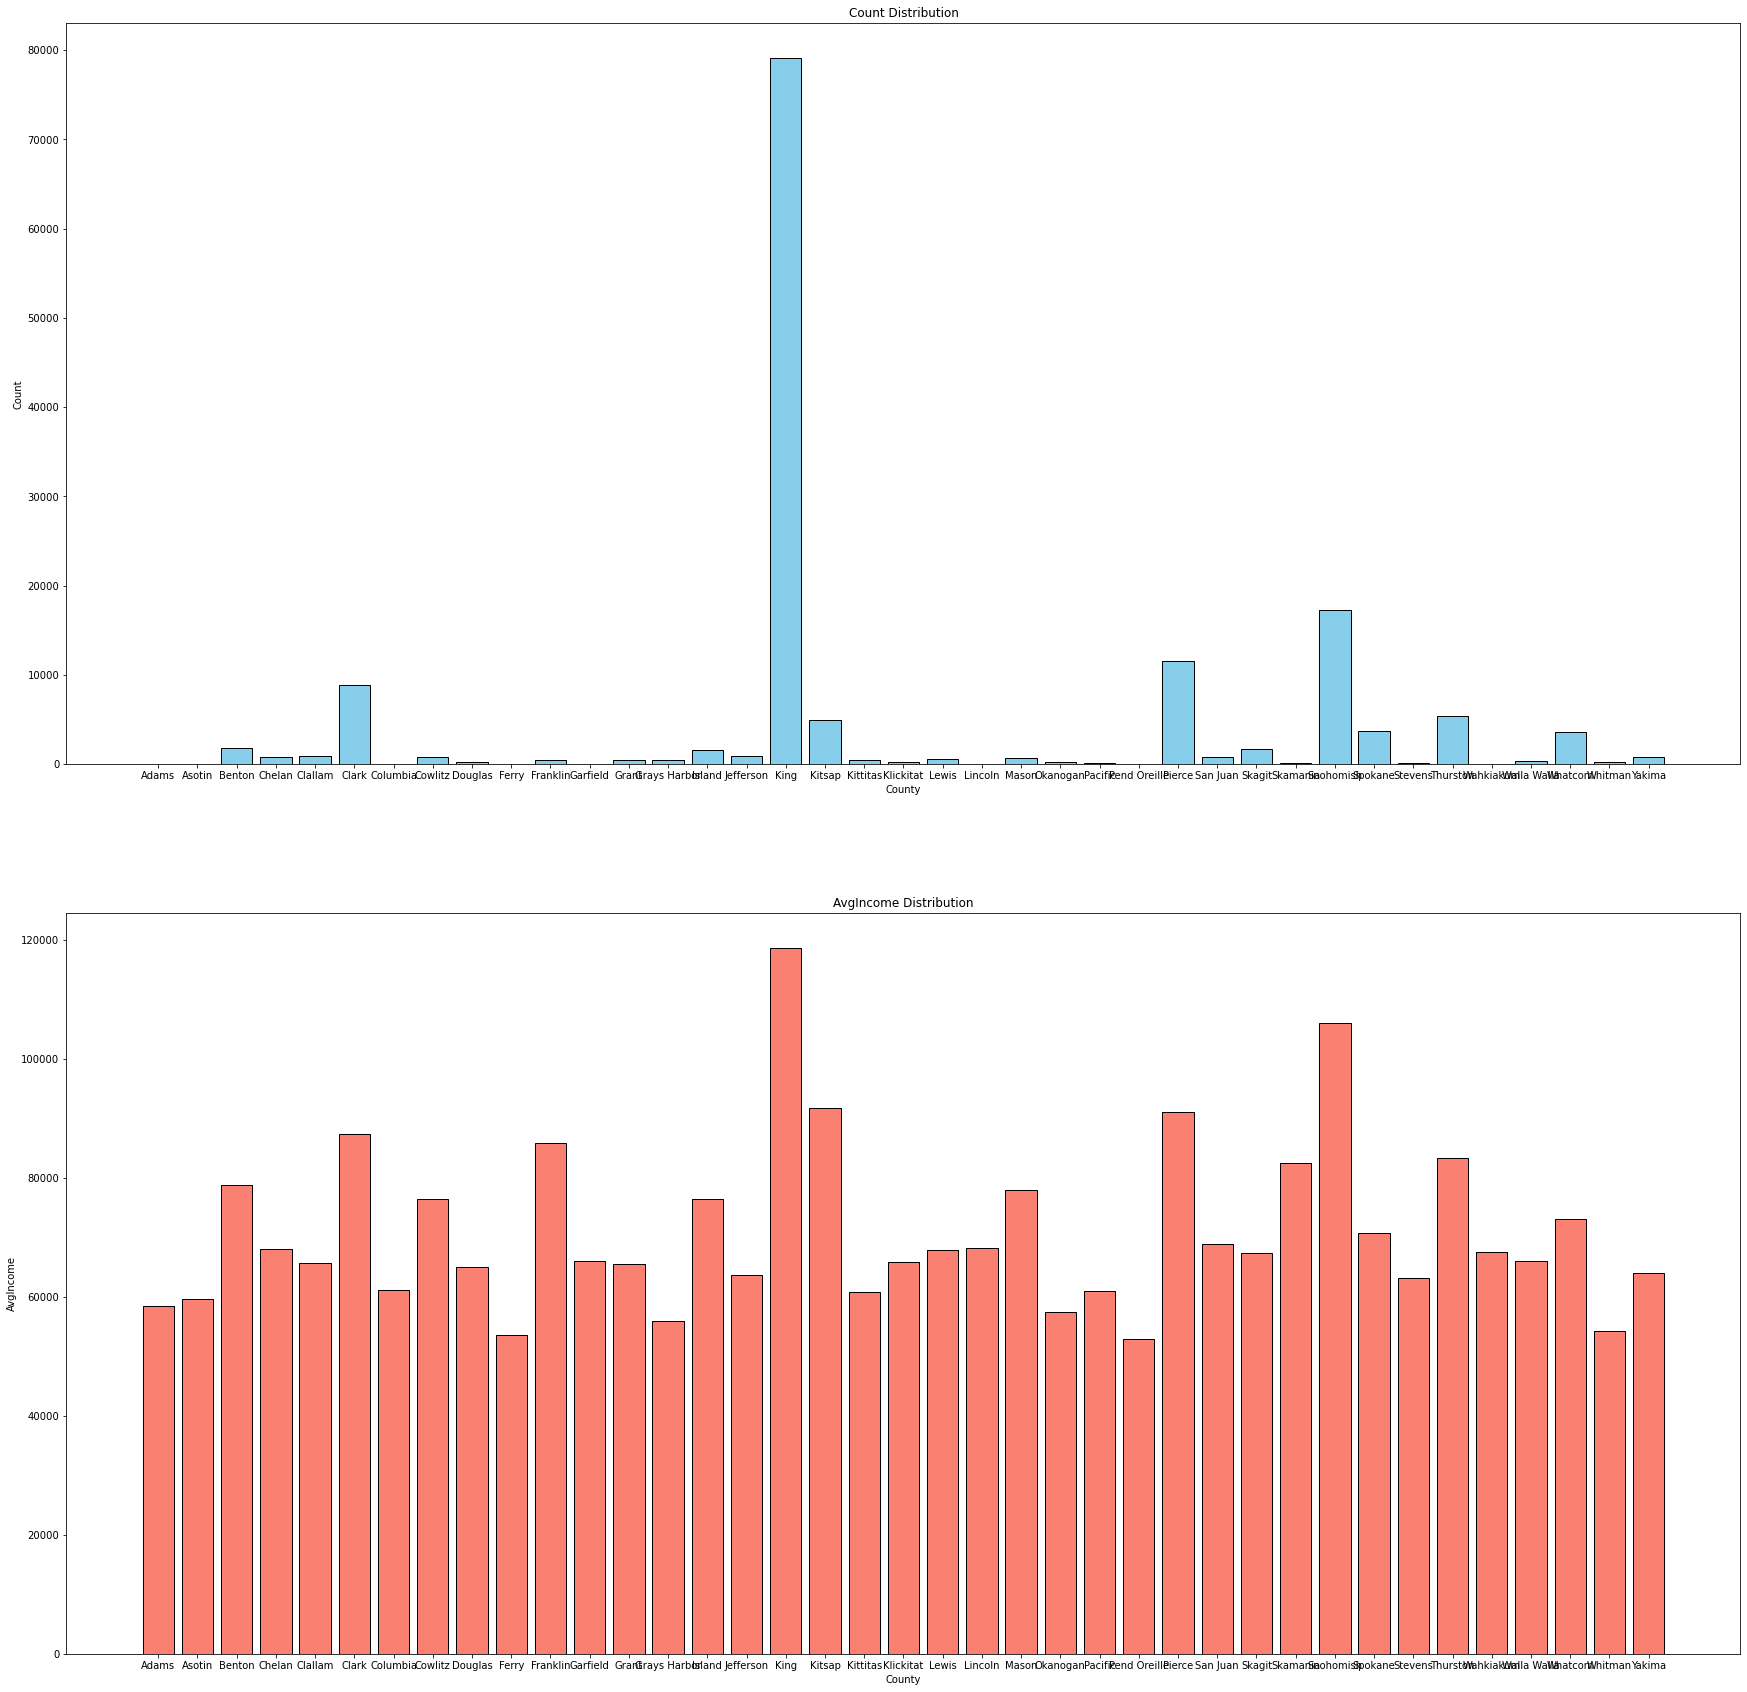

In [34]:
# plots of the data distributions
plt.figure(figsize=(30, 30))

# Histogram for Sales
plt.subplot(2, 1, 1)
plt.bar(result_df2['County'],result_df2['Count'], color='skyblue', edgecolor='black')
plt.title('Count Distribution')
plt.xlabel('County')
plt.ylabel('Count')

# Histogram for Temperature
plt.subplot(2, 1, 2)
plt.bar(result_df2['County'],result_df2['AvgIncome'], color='salmon', edgecolor='black')
plt.title('AvgIncome Distribution')
plt.xlabel('County')
plt.ylabel('AvgIncome')


plt.show()

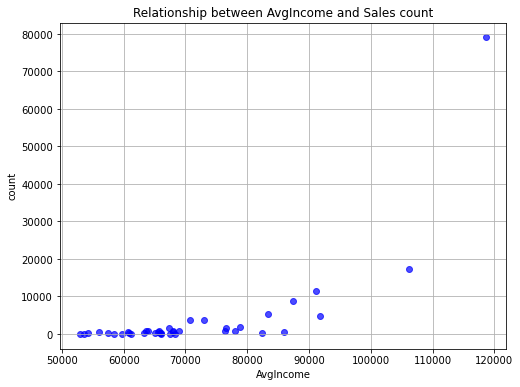

Correlation Coefficient between AvgIncome and count: 0.7114891016529895


In [14]:
correlation = result_df2['AvgIncome'].corr(result_df2['Count'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(result_df2['AvgIncome'], result_df2['Count'], color='blue', alpha=0.7)
plt.title('Relationship between AvgIncome and Sales count')
plt.xlabel('AvgIncome')
plt.ylabel('count')
plt.grid(True)
plt.show()

# Print the correlation coefficient
print(f'Correlation Coefficient between AvgIncome and count: {correlation}')

In [15]:
# Define the independent variable (X) and the dependent variable (y)
X = result_df2['AvgIncome']
X = sm.add_constant(X)  # Add a constant term to the independent variable
y = result_df2['Count']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     37.93
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.83e-07
Time:                        12:05:38   Log-Likelihood:                -410.08
No. Observations:                  39   AIC:                             824.2
Df Residuals:                      37   BIC:                             827.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.213e+04   7608.376     -5.537      0.0

In [19]:
x = result_df2['AvgIncome']
y = result_df2['Count']

correlation_coefficient, p_value = stats.pearsonr(x, y)

# Print results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

Pearson Correlation Coefficient: 0.7114891016529898
P-Value: 3.8271469078415625e-07
